# Kernelized Support Vector Machines

Principle : Kernelized support vector machines (often just referred to as SVMs) are an extension that allows for more complex mod‐ els that are not defined simply by hyperplanes in the input space. One way to make a linear model more flexible is by adding more features—for example, by adding interactions or polynomials of the input features.
However, often we don’t know which features to add, and adding many features might make computation very expensive. *Kernel trick* : works by directly computing the distance (i.e. the scalar products) of the data points for the expanded feature representation, without ever actually computing the expansion.
There are two ways to map your data into a higher-dimensional space that are com‐ monly used with support vector machines: the polynomial kernel, which computes all possible polynomials up to a certain degree of the original features (like feature1 ** 2 * feature2 ** 5); and the radial basis function (RBF) kernel, also known as the Gaussian kernel.

In [2]:
import mglearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

/usr/local/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### First test

In [26]:
gt = pd.read_csv('../dumps/2020.01.13-14.25.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

svc = SVC()
svc.fit(data_train, target_train)
print("Accuracy on training set: {:.3f}".format(svc.score(data_train, target_train))) 
print("Accuracy on test set: {:.3f}".format(svc.score(data_test, target_test)))

Accuracy on training set: 0.816
Accuracy on test set: 0.809


### Further tests

Kernel parameters selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non linear hyper-plane. We'll focus on the two last ones in this section.

Let's now carry on with a bigger dataset and try with different values of the parameters.

In [3]:
gt = pd.read_csv('../dumps/2020.02.10-12.14.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

#### Gamma

The *gamma* parameter controls the width of the Gaussian kernel. It determines the scale of what it means for points to be close together. The higher the gamma value it tries to exactly fit the training data set.

In [30]:
gammas = [0.1, 1, 10, 100]
for i in gammas:
    print("min_samples_split set to %s" % i)
    svc = SVC(kernel='rbf', gamma=i)
    svc.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(svc.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(svc.score(data_test, target_test)))

min_samples_split set to 0.1
Accuracy on training set: 1.000
Accuracy on test set: 0.824
min_samples_split set to 1
Accuracy on training set: 1.000
Accuracy on test set: 0.824
min_samples_split set to 10
Accuracy on training set: 1.000
Accuracy on test set: 0.824
min_samples_split set to 100
Accuracy on training set: 1.000
Accuracy on test set: 0.824


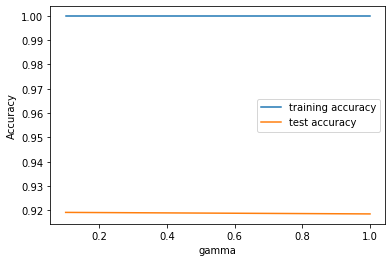

In [5]:
training_accuracy = [] 
test_accuracy = []
gammas = [0.1, 1]
for v in gammas:
    clf = SVC(kernel='rbf', gamma=v) 
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(gammas, training_accuracy, label="training accuracy") 
plt.plot(gammas, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("gamma")
plt.legend()

#### C

The *C* parameter is a regularization parameter, similar to that used in the linear models. It limits the importance of each point.

In [33]:
c_values = [0.1, 1, 10, 100, 1000]
for i in c_values:
    print("min_samples_split set to %s" % i)
    svc = SVC(kernel='rbf', C=i)
    svc.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(svc.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(svc.score(data_test, target_test)))

min_samples_split set to 0.1
Accuracy on training set: 0.815
Accuracy on test set: 0.809
min_samples_split set to 1
Accuracy on training set: 0.816
Accuracy on test set: 0.809
min_samples_split set to 10
Accuracy on training set: 0.816
Accuracy on test set: 0.809
min_samples_split set to 100
Accuracy on training set: 0.816
Accuracy on test set: 0.809
min_samples_split set to 1000
Accuracy on training set: 0.818
Accuracy on test set: 0.809


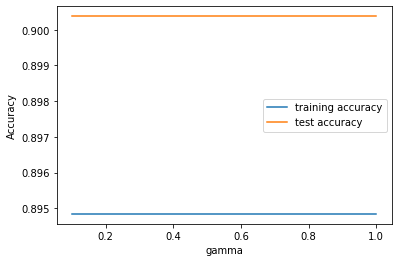

In [6]:
training_accuracy = [] 
test_accuracy = []
c_values = [0.1, 1]
for v in c_values:
    clf = SVC(kernel='rbf', C=v) 
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(c_values, training_accuracy, label="training accuracy") 
plt.plot(c_values, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

#### Degree

*degree* is a parameter used when kernel is set to ‘poly’. It’s basically the degree of the polynomial used to find the hyperplane to split the data.

In [35]:
degrees = [0, 1, 2, 3, 4, 5, 6]
for i in degrees:
    print("min_samples_split set to %s" % i)
    svc = SVC(kernel='poly', degree=i)
    svc.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(svc.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(svc.score(data_test, target_test)))

min_samples_split set to 0
Accuracy on training set: 0.815
Accuracy on test set: 0.809
min_samples_split set to 1
Accuracy on training set: 0.816
Accuracy on test set: 0.809
min_samples_split set to 2
Accuracy on training set: 0.816
Accuracy on test set: 0.809
min_samples_split set to 3
Accuracy on training set: 0.816
Accuracy on test set: 0.809
min_samples_split set to 4
Accuracy on training set: 0.816
Accuracy on test set: 0.809
min_samples_split set to 5
Accuracy on training set: 0.816
Accuracy on test set: 0.809
min_samples_split set to 6
Accuracy on training set: 0.816
Accuracy on test set: 0.809


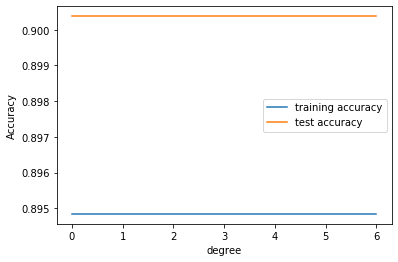

In [8]:
training_accuracy = [] 
test_accuracy = []
degrees = [0, 1, 2, 3, 4, 5, 6]
for v in degrees:
    clf = SVC(kernel='rbf', degree=v) 
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(degrees, training_accuracy, label="training accuracy") 
plt.plot(degrees, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("degree")
plt.legend()

### Best match

In [9]:
gt = pd.read_csv('../dumps/2020.02.10-12.14.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

In [ ]:
parameters = {'kernel': ['rbf','poly'], 'gamma' : [0.1,1,10,100,1000], 'C': [0.1,1,10,100,1000]}
clf = GridSearchCV(SVC(), parameters, n_jobs=-1)
clf.fit(data_train, target_train)
print(clf.score(data_train, target_train))
print(clf.best_params_)
print(clf.score(data_test, target_test))
print(clf.best_params_)

In [ ]:
parameters = {'kernel': ['rbf','poly'], 'gamma' : [0.1,1,10,100,1000], 'C': [0.1,1,10,100,1000]}
clf = RandomizedSearchCV(SVC(), parameters, n_jobs=-1)
clf.fit(data_train, target_train)
print(clf.score(data_train, target_train))
print(clf.best_params_)
print(clf.score(data_test, target_test))
print(clf.best_params_)